In [0]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'G'

df = pd.read_excel("1440min.xlsx").sort_values(by="ds")

In [0]:
y = df.set_index(['ds']).sort_values(by="ds")
df.head()

,ds,y
61,2020-02-16,1131
60,2020-02-17,1802
59,2020-02-18,1496
58,2020-02-19,1371
57,2020-02-20,1092


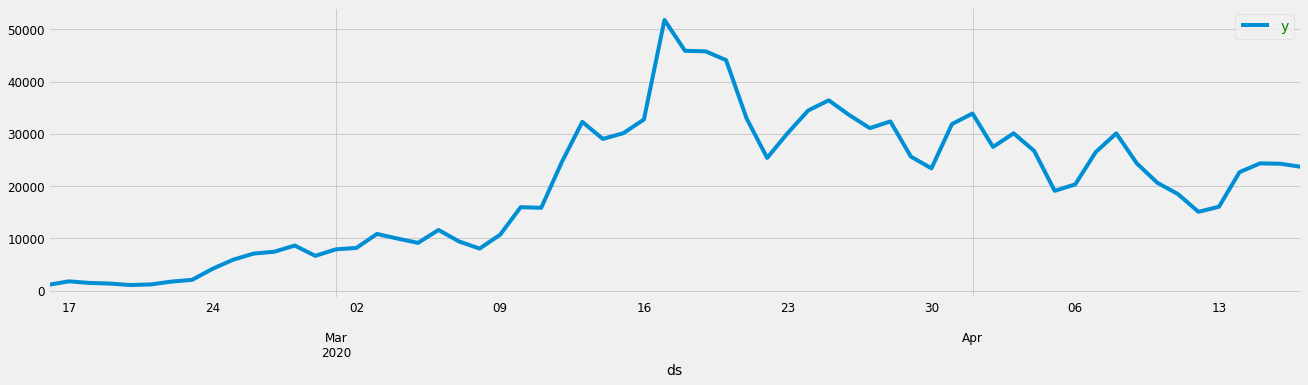

In [0]:
y.plot(figsize=(20,5))
plt.show()

In [0]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [0]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = model.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param,param_seasonal,results.aic))
        except: 
            continue


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1406.2234883420258
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1108.812255187754
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1088.7087073334205
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:833.0620606530305
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1110.6377905286154
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1090.3870010364449
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:854.6394496362204
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:868.938300294786
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1343.7844419077514
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1074.1701300266582
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1035.2794170741506
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:781.766834426216
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1115.187211209306
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1073.0950422064996
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:825.4773238655661
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:783.525547863917
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1184.678413284852
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:959.9749719785684
ARIMA

In [0]:
model = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = model.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1670      0.192      0.868      0.386      -0.210       0.544
ar.S.L12      -0.1753      0.256     -0.684      0.494      -0.677       0.327
ma.S.L12      -1.2201      0.297     -4.113      0.000      -1.801      -0.639
sigma2      2.496e+07   1.54e-08   1.62e+15      0.000     2.5e+07     2.5e+07


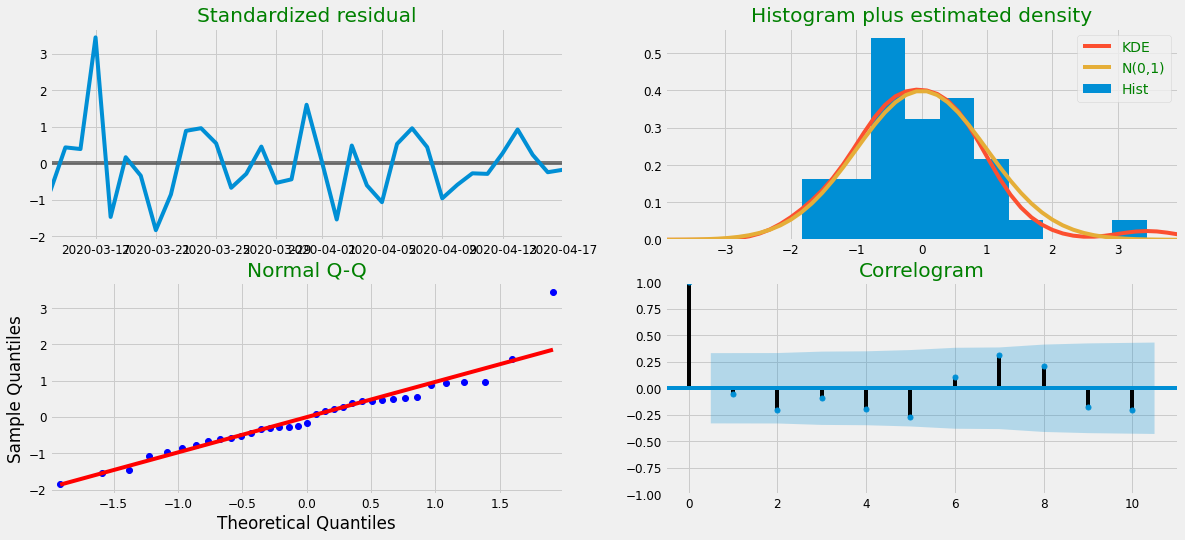

In [0]:
results.plot_diagnostics(figsize=(18, 8))
plt.show()

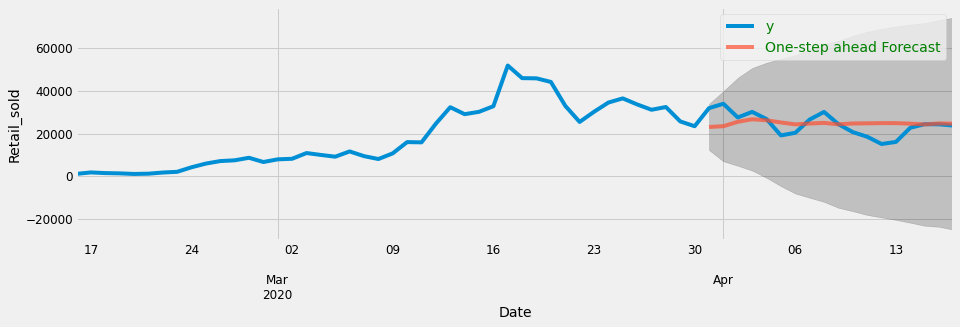

In [0]:
pred = results.get_prediction(start=pd.to_datetime('2020-3-31'), dynamic=True)
pred_ci = pred.conf_int()
ax = y['2020':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 4))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Retail_sold')
plt.legend()
plt.show()

In [0]:
import numpy as np
import pandas as pd
from fbprophet import Prophet
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight')

In [0]:

def mean_absolute_percentage_error(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MSE = mean_squared_error(y_true=y['2020-3-31':],
y_pred=pred.predicted_mean)
MAE = mean_absolute_error(y_true=y['2020-3-31':],
y_pred=pred.predicted_mean)
MAPE = mean_absolute_percentage_error(y_true=y['2020-3-31':],
y_pred=pred.predicted_mean)
print ('MSE :',MSE)
print ('MAE :',MAE)
print ('MAEP', MAPE, '%')
y_pred = pred.predicted_mean ;y_true = y['2020-3-31':]

MSE : 28827140.193989303
MAE : 4145.221112565765
MAEP 19.68327302426724 %


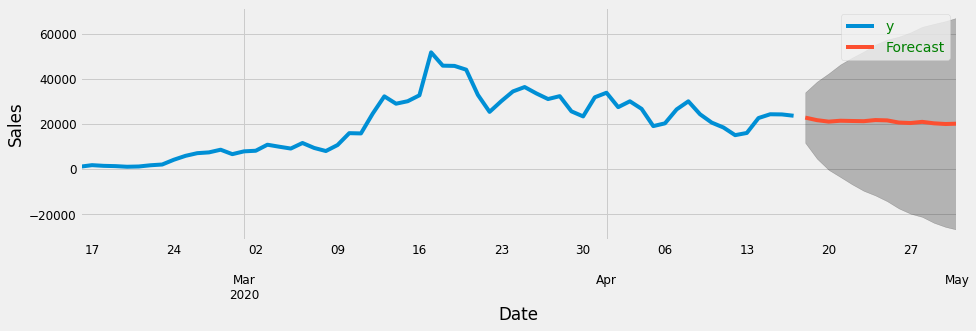

In [0]:
pred_uc = results.get_forecast(steps=14)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 4))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()

In [0]:
y_forecasted = pred.predicted_mean
y_forecasted.head(14)

2020-03-31    23066.451578
2020-04-01    23417.591062
2020-04-02    25476.666037
2020-04-03    26658.069556
2020-04-04    26199.235362
2020-04-05    25158.264743
2020-04-06    24294.283957
2020-04-07    24669.471107
2020-04-08    24981.899835
2020-04-09    24298.080286
2020-04-10    24699.322239
2020-04-11    24763.929933
2020-04-12    24868.099002
2020-04-13    24863.957941
Freq: D, dtype: float64

In [0]:
y_truth.head(48)


,carsales
data,
2020-03-31 00:00:00,1273
2020-03-31 03:00:00,598
2020-03-31 06:00:00,3077
2020-03-31 09:00:00,6604
2020-03-31 12:00:00,6989
2020-03-31 15:00:00,6614
2020-03-31 18:00:00,6006
2020-03-31 21:00:00,4720
2020-04-01 00:00:00,1623


In [0]:
pred_ci.head(48)

,lower carsales,upper carsales
2020-04-18 03:00:00,-1563.669634,1903.600345
2020-04-18 06:00:00,112.484161,4356.711510
2020-04-18 09:00:00,2164.266416,6408.493766
2020-04-18 12:00:00,1720.716494,5964.943843
2020-04-18 15:00:00,1735.009274,5979.236623
2020-04-18 18:00:00,2506.900082,6751.127431
2020-04-18 21:00:00,808.075824,5052.303173
2020-04-19 00:00:00,-1079.662320,3164.565030
2020-04-19 03:00:00,-1779.326826,2464.900524
2020-04-19 06:00:00,-51.862295,4192.365054


2020-04-18 03:00:00     169.965356
2020-04-18 06:00:00    2234.597835
2020-04-18 09:00:00    4286.380091
2020-04-18 12:00:00    3842.830169
2020-04-18 15:00:00    3857.122949
2020-04-18 18:00:00    4629.013756
2020-04-18 21:00:00    2930.189498
2020-04-19 00:00:00    1042.451355
2020-04-19 03:00:00     342.786849
2020-04-19 06:00:00    2070.251380
2020-04-19 09:00:00    4407.423191
2020-04-19 12:00:00    3629.795027
2020-04-19 15:00:00    4255.547099
2020-04-19 18:00:00    4178.099070
2020-04-19 21:00:00    2356.367219
2020-04-20 00:00:00     932.169722
2020-04-20 03:00:00     596.035502
2020-04-20 06:00:00    2339.588535
2020-04-20 09:00:00    5027.031639
2020-04-20 12:00:00    3594.038191
2020-04-20 15:00:00    3737.670420
2020-04-20 18:00:00    3169.504485
2020-04-20 21:00:00    1936.759811
2020-04-21 00:00:00     226.656225
2020-04-21 03:00:00     325.471543
2020-04-21 06:00:00    2308.571748
2020-04-21 09:00:00    4212.919575
2020-04-21 12:00:00    3732.044059
2020-04-21 15:00:00 